In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,accuracy_score

In [2]:
data = pd.read_csv("heart-disease.csv")

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = data.drop("target",axis = 1)

y = data["target"]

In [4]:
model =  RandomForestClassifier(n_estimators=100)

x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = .2)

model.fit(x_train,y_train)

model.score(x_test,y_test)

0.7540983606557377

# Cross Validation Score

In [5]:
cvs = cross_val_score(model,X,y, cv=5)

print(f"Cross Validation Score : {np.mean(cvs)*100:.2f}%")

Cross Validation Score : 82.15%


# ROC Curve Score

In [6]:
y_proba = model.predict_proba(x_test)

y_proba_pos = y_proba[:,1]

fpr,tpr,threshold = roc_curve(y_test,y_proba_pos)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.03846154,
       0.03846154, 0.03846154, 0.07692308, 0.07692308, 0.07692308,
       0.15384615, 0.15384615, 0.19230769, 0.19230769, 0.23076923,
       0.23076923, 0.26923077, 0.26923077, 0.26923077, 0.26923077,
       0.30769231, 0.30769231, 0.34615385, 0.34615385, 0.61538462,
       0.61538462, 0.84615385, 0.84615385, 0.88461538, 1.        ])

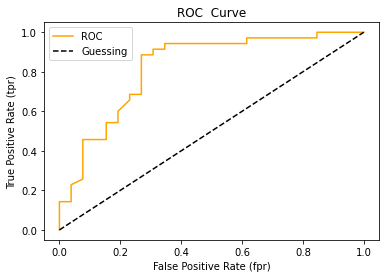

In [7]:
plt.plot(fpr,tpr, color="orange",label="ROC")
plt.plot([0,1],[0,1],color="black",linestyle="--",label="Guessing")

plt.xlabel("False Positive Rate (fpr)")
plt.ylabel("True Positive Rate (tpr)")
plt.title("ROC  Curve")
plt.legend()
plt.show();

# ROC Curve Accuracy

In [8]:
roc_ca = roc_auc_score(y_test,y_proba_pos)

roc_ca

0.8225274725274725

In [9]:
roc_auc_score(y_test,y_test)

1.0

# Confusion Matrix

In [10]:
y_pred = model.predict(x_test)

conf_mat = confusion_matrix(y_test,y_pred)

conf_mat

array([[19,  7],
       [ 8, 27]], dtype=int64)

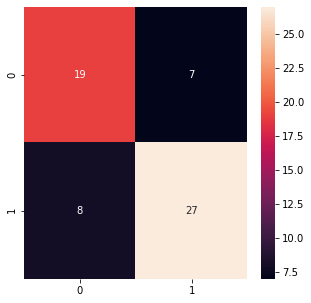

In [11]:
fig,ax = plt.subplots(figsize = (5,5))
ax = sns.heatmap(conf_mat,annot = True,cbar = True)

ax;

# Classification Report

In [12]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.70      0.73      0.72        26\n           1       0.79      0.77      0.78        35\n\n    accuracy                           0.75        61\n   macro avg       0.75      0.75      0.75        61\nweighted avg       0.76      0.75      0.75        61\n'

# Evaluation

In [13]:
print("Classifier metric on the test set\n\n")

print(f"Accuracy : {accuracy_score(y_test,y_pred)*100:.2f}%")
print(f"Precision : {precision_score(y_test,y_pred)*100:.2f}%")
print(f"Recall : {recall_score(y_test,y_pred)*100:.2f}%")
print(f"F1 : {f1_score(y_test,y_pred)*100:.2f}%")

Classifier metric on the test set


Accuracy : 75.41%
Precision : 79.41%
Recall : 77.14%
F1 : 78.26%
